In [42]:
## Making a binary classification dataset having linear seperability

from sklearn.datasets import make_classification
import numpy as np
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=10)

<AxesSubplot:>

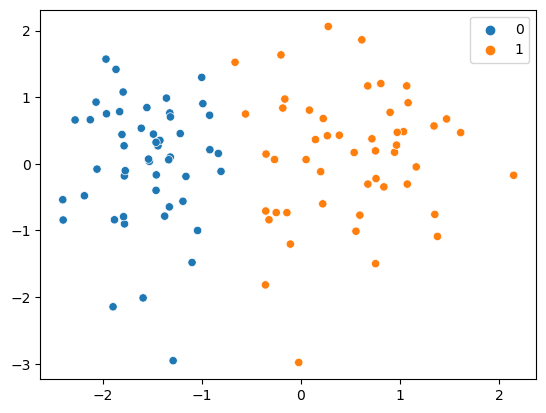

In [43]:
## plotting of dataset with resepect to y value 

import seaborn as sns
sns.scatterplot(x = X[:,0] , y = X[:,1] , hue= y)

In [48]:
## Now how to find the Coefficients (A , B , C ) -> (wo , w1 , w2)
## Traning Process (without using sklearn library for finding wo , w1 , w2) manually writing our algorithm to find all values

def Perceptron(X , y):
    ## phele ek columns insert kar do xo jo sari values 1 contain kar raha ho jaisa humne algo me discuss kiya tha
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1]) ## [1,1,1] -> [wo , w1 , w2]
    lr = 0.1
    
    for i in range(10000):
        ## Randomly select a student
        j = np.random.randint(0,100) ## we have 100 samples so we give range (0,100) we are taking the position of student
        ## now finding the predicted value by our model
        y_hat = step(np.dot(X[j] , weights)) ## step funtion simply returns 1 or 0 based on value computed
        ## now updation of weights
        weights = weights + lr * (y[j] - y_hat) * X[j]
        
        return weights[0] , weights[1:]
        ## weights[0] represent wo
        ## weights[1:] represent w1 , w2 values
      

In [49]:
## now writing step function 

def step(z):
    return 1 if z > 0 else 0

In [50]:
intercept_ , coef_ = Perceptron(X , y)

In [51]:
intercept_ 

0.9

In [52]:
coef_

array([1.13155857, 0.92958766])

In [53]:
## after finding the value of wo , w1 , w2 simply A , B , C values then we can also find m , c values to make a straight line 

## m = -A / B
## c = -C / B

m = -(coef_[0] / coef_[1])
c = -(intercept_ / coef_[1])

In [54]:
m

-1.2172693553314695

In [55]:
c

-0.9681712009501826

In [56]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + c

(-3.0, 2.0)

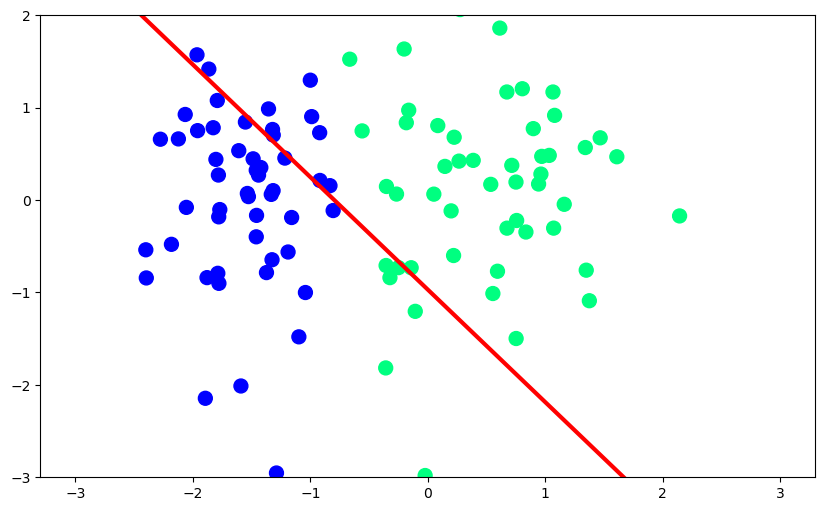

In [57]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)